Trương Duy Kha 19146015

Link Github: https://github.com/TruongDuyKha/Food_CNN.git

Link dataset: https://drive.google.com/drive/folders/1YQwqpIGhF9jHEBwYFyS-Rs_c-KiNp5rr?usp=sharing

In [21]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
import glob

In [ ]:
banh_beo = list()
for img in glob.glob('/content/drive/MyDrive/Food_dataset/Banh_beo/*.jpg')[:30]:
  banh_beo.append(img_to_array(load_img(img,target_size=(150,150))))
banh_bot_loc = list()
for img in glob.glob('/content/drive/MyDrive/Food_dataset/Banh_bot_loc/*.jpg')[:30]:
  banh_bot_loc.append(img_to_array(load_img(img,target_size=(150,150))))
banh_can = list()
for img in glob.glob('/content/drive/MyDrive/Food_dataset/Banh_can/*.jpg')[:30]:
  banh_can.append(img_to_array(load_img(img,target_size=(150,150))))
banh_canh = list()
for img in glob.glob('/content/drive/MyDrive/Food_dataset/Banh_canh/*.jpg')[:30]:
  banh_canh.append(img_to_array(load_img(img,target_size=(150,150))))
banh_chung = list()
for img in glob.glob('/content/drive/MyDrive/Food_dataset/Banh_chung/*.jpg')[:30]:
  banh_chung.append(img_to_array(load_img(img,target_size=(150,150))))
banh_cuon = list()
for img in glob.glob('/content/drive/MyDrive/Food_dataset/Banh_cuon/*.jpg')[:30]:
  banh_cuon.append(img_to_array(load_img(img,target_size=(150,150))))
banh_duc = list()
for img in glob.glob('/content/drive/MyDrive/Food_dataset/Banh_duc/*.jpg')[:30]:
  banh_duc.append(img_to_array(load_img(img,target_size=(150,150))))
banh_gio = list()
for img in glob.glob('/content/drive/MyDrive/Food_dataset/Banh_gio/*.jpg')[:30]:
  banh_gio.append(img_to_array(load_img(img,target_size=(150,150))))
banh_khot = list()
for img in glob.glob('/content/drive/MyDrive/Food_dataset/Banh_khot/*.jpg')[:30]:
  banh_khot.append(img_to_array(load_img(img,target_size=(150,150))))
banh_mi = list()
for img in glob.glob('/content/drive/MyDrive/Food_dataset/Banh_mi/*.jpg')[:30]:
  banh_mi.append(img_to_array(load_img(img,target_size=(150,150))))

In [ ]:
input_dataset = np.array(banh_beo + banh_bot_loc+banh_can+banh_canh+banh_chung+banh_cuon+banh_duc+banh_gio+banh_khot+banh_mi)
label_dataset = np.array([0]*len(banh_beo) + [1]*len(banh_bot_loc) + [2]*len(banh_can) + [3]*len(banh_canh) + [4]*len(banh_chung) + [5]*len(banh_cuon) + [6]*len(banh_duc) + [7]*len(banh_gio) + [8]*len(banh_khot) + [9]*len(banh_mi))

In [ ]:
print(input_dataset.shape)
print(label_dataset.shape)

(1500, 150, 150, 3)
(1500,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(input_dataset,label_dataset
                                                    ,train_size=0.8, test_size=0.2, random_state= 0)

In [ ]:
y_test.shape

(300,)

In [ ]:
y_train.shape

(1200,)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test/= 255

In [ ]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [20]:
Model = Sequential()
Model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer= 'he_uniform', padding = 'same',input_shape = (150,150,3)))
Model.add(Conv2D(32,(3,3),activation = 'relu', kernel_initializer= 'he_uniform',padding = 'same'))
Model.add(MaxPooling2D((2,2)))
Model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer= 'he_uniform', padding = 'same'))
Model.add(Conv2D(64,(3,3),activation = 'relu', kernel_initializer= 'he_uniform',padding = 'same'))
Model.add(MaxPooling2D((2,2)))
Model.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer= 'he_uniform', padding = 'same'))
Model.add(Conv2D(128,(3,3),activation = 'relu', kernel_initializer= 'he_uniform',padding = 'same'))
Model.add(MaxPooling2D((2,2)))
Model.add(Flatten())
Model.add(Dense(128,activation= 'relu',kernel_initializer='he_uniform'))
Model.add(Dense(10,activation = 'softmax'))
opt = SGD(lr = 0.01,momentum = 0.9)
Model.compile(optimizer= opt,loss = 'categorical_crossentropy', metrics=['accuracy'])
history = Model.fit(x_train,y_train,epochs=20,batch_size = 128,validation_data=(x_test,y_test), verbose=1)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


10/10 [==============================] - 174s 17s/step - loss: 3.7572 - accuracy: 0.1067 - val_loss: 2.3154 - val_accuracy: 0.0600
Epoch 2/20
10/10 [==============================] - 171s 17s/step - loss: 2.3006 - accuracy: 0.1100 - val_loss: 2.3099 - val_accuracy: 0.0600
Epoch 3/20
10/10 [==============================] - 171s 17s/step - loss: 2.2911 - accuracy: 0.1142 - val_loss: 2.3007 - val_accuracy: 0.0600
Epoch 4/20
10/10 [==============================] - 176s 18s/step - loss: 2.2672 - accuracy: 0.1375 - val_loss: 2.2555 - val_accuracy: 0.1633
Epoch 5/20
10/10 [==============================] - 171s 17s/step - loss: 2.2179 - accuracy: 0.1717 - val_loss: 2.2486 - val_accuracy: 0.1733
Epoch 6/20
10/10 [==============================] - 171s 17s/step - loss: 2.1329 - accuracy: 0.2275 - val_loss: 2.2183 - val_accuracy: 0.2233
Epoch 7/20
10/10 [==============================] - 174s 17s/step - loss: 2.0908 - accuracy: 0.2408 - val_loss: 2.1632 - val_accuracy: 0.1667
Epoch 8/20
10/10 

In [22]:
score = Model.evaluate(x_test,y_test,verbose = 1)

10/10 [==============================] - 11s 1s/step - loss: 3.8940 - accuracy: 0.2667


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


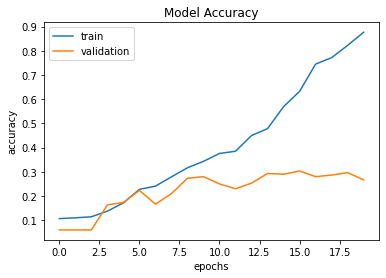

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','validation'],loc='upper_left')

banh_cuon


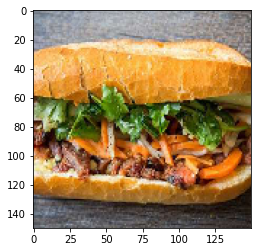

In [24]:
y_label = ['banh_beo', 'banh_bot_loc','banh_can','banh_canh','banh_chung','banh_cuon','banh_duc','banh_gio','banh_khot','banh_mi']
img = load_img('1.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
print(y_label[np.argmax(Model.predict(img),axis = 1)[0]])

banh_cuon


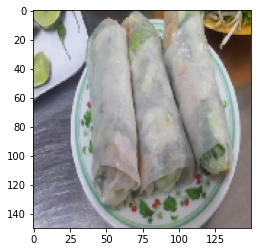

In [25]:
img = load_img('15.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
print(y_label[np.argmax(Model.predict(img),axis = 1)[0]])

banh_beo


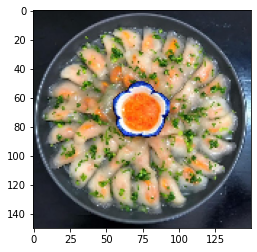

In [26]:
img = load_img('14.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
print(y_label[np.argmax(Model.predict(img),axis = 1)[0]])

banh_beo


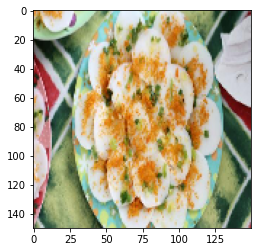

In [27]:
img = load_img('3.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
print(y_label[np.argmax(Model.predict(img),axis = 1)[0]])